In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os.path
import json
import time

In [2]:
# https://er.ncsbe.gov/contest_details.html?election_dt=11/03/2020&county_id=92&contest_id=1373
DATA_ROOT_PATH = '/src/data/nc-voting'
FILENAME = 'wake-county-precinct-2020.csv'

In [3]:
df = pd.read_csv (os.path.join(DATA_ROOT_PATH, FILENAME))

In [4]:
df.head(10)

,Precinct,Reporting Status,Joseph R. Biden,Donald J. Trump,Jo Jorgensen,Write-In (Miscellaneous),Howie Hawkins,Don Blankenship
0,01-01,Final Election Night Results (unofficial),125,74,5,2,1,0
1,01-02,Final Election Night Results (unofficial),128,119,4,3,3,0
2,01-03,Final Election Night Results (unofficial),112,190,8,1,2,0
3,01-04,Final Election Night Results (unofficial),109,131,3,1,3,1
4,01-05,Final Election Night Results (unofficial),136,191,1,0,0,1
5,01-06,Final Election Night Results (unofficial),182,164,1,4,3,1
6,01-07,Final Election Night Results (unofficial),159,119,11,3,1,0
7,01-07A,Final Election Night Results (unofficial),58,24,0,0,0,0
8,01-09,Final Election Night Results (unofficial),154,95,5,2,1,0
9,01-10,Final Election Night Results (unofficial),158,166,5,1,0,0


In [5]:
df.dtypes

Precinct                    object
Reporting Status            object
Joseph R. Biden              int64
Donald J. Trump              int64
Jo Jorgensen                 int64
Write-In (Miscellaneous)     int64
Howie Hawkins                int64
Don Blankenship              int64
dtype: object

In [13]:
def get_first_digit(num):
    num_str=str(num)
    return int(num_str[0])

In [15]:
assert get_first_digit(459)==4
assert get_first_digit(23451)==2
assert get_first_digit(953)==9

In [17]:
df['JOE_1ST'] = df['Joseph R. Biden'].apply(get_first_digit)
df['DONALD_1ST'] = df['Donald J. Trump'].apply(get_first_digit)
df['JO_1ST'] = df['Jo Jorgensen'].apply(get_first_digit)

In [18]:
df.head(10)

,Precinct,Reporting Status,Joseph R. Biden,Donald J. Trump,Jo Jorgensen,Write-In (Miscellaneous),Howie Hawkins,Don Blankenship,JOE_1ST,DONALD_1ST,JO_1ST
0,01-01,Final Election Night Results (unofficial),125,74,5,2,1,0,1,7,5
1,01-02,Final Election Night Results (unofficial),128,119,4,3,3,0,1,1,4
2,01-03,Final Election Night Results (unofficial),112,190,8,1,2,0,1,1,8
3,01-04,Final Election Night Results (unofficial),109,131,3,1,3,1,1,1,3
4,01-05,Final Election Night Results (unofficial),136,191,1,0,0,1,1,1,1
5,01-06,Final Election Night Results (unofficial),182,164,1,4,3,1,1,1,1
6,01-07,Final Election Night Results (unofficial),159,119,11,3,1,0,1,1,1
7,01-07A,Final Election Night Results (unofficial),58,24,0,0,0,0,5,2,0
8,01-09,Final Election Night Results (unofficial),154,95,5,2,1,0,1,9,5
9,01-10,Final Election Night Results (unofficial),158,166,5,1,0,0,1,1,5


In [41]:
len(df.index)

298

In [34]:
s_dict = dict()
s_name = ('JOE_1ST', 'DONALD_1ST', 'JO_1ST',)

for name in s_name:
    serie=df[name].value_counts().sort_index().drop(index=0)
    s_dict[name] = serie
    print(name)
    print(serie)

JOE_1ST
1    130
2     61
3     16
4     10
5      8
6     12
7     10
8     14
9     14
Name: JOE_1ST, dtype: int64
DONALD_1ST
1    92
2    82
3    34
4    24
5    11
6    10
7     8
8     6
9    10
Name: DONALD_1ST, dtype: int64
JO_1ST
1    108
2     23
3     19
4     16
5     28
6     13
7     24
8     21
9     12
Name: JO_1ST, dtype: int64


In [46]:
def plot_graph(name):
    plt.bar(s_dict[name].index, s_dict[name].values)
    plt.xticks(s_dict[name].index)
    plt.xlabel("First leading number")
    plt.title(name)

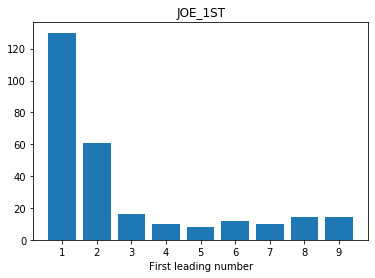

In [47]:
plot_graph('JOE_1ST')

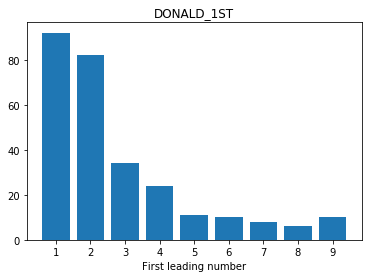

In [48]:
plot_graph('DONALD_1ST')

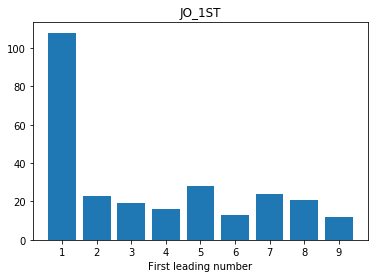

In [49]:
plot_graph('JO_1ST')